In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Reading the dataset
df=pd.read_csv(r"D:\sivadownload\pulse-master\pulse-master\data\Agg_Trans.csv")

In [3]:
df

,State,Year,Quarter,Agg_Transaction_Type,Agg_Transaction_Count,Agg_Transaction_Amount
0,andaman-&-nicobar-islands,2018,1,Recharge & bill payments,4200,1.845307e+06
1,andaman-&-nicobar-islands,2018,1,Peer-to-peer payments,1871,1.213866e+07
2,andaman-&-nicobar-islands,2018,1,Merchant payments,298,4.525072e+05
3,andaman-&-nicobar-islands,2018,1,Financial Services,33,1.060142e+04
4,andaman-&-nicobar-islands,2018,1,Others,256,1.846899e+05
...,...,...,...,...,...,...
4489,west-bengal,2024,1,Merchant payments,407607197,2.732137e+11
4490,west-bengal,2024,1,Peer-to-peer payments,355646156,1.100744e+12
4491,west-bengal,2024,1,Recharge & bill payments,72216060,4.716192e+10
4492,west-bengal,2024,1,Financial Services,451008,5.307383e+08


In [4]:
df.describe()

,Year,Quarter,Agg_Transaction_Count,Agg_Transaction_Amount
count,4494.000000,4494.000000,4.494000e+03,4.494000e+03
mean,2020.642412,2.440810,3.498394e+07,5.459639e+10
std,1.808452,1.134388,1.259652e+08,2.197381e+11
min,2018.000000,1.000000,2.000000e+00,3.439721e+01
25%,2019.000000,1.000000,5.070700e+04,3.451190e+07
50%,2021.000000,2.000000,4.507395e+05,3.676365e+08
75%,2022.000000,3.000000,9.484871e+06,8.857347e+09
max,2024.000000,4.000000,1.821471e+09,2.641887e+12


In [5]:
df.head()

,State,Year,Quarter,Agg_Transaction_Type,Agg_Transaction_Count,Agg_Transaction_Amount
0,andaman-&-nicobar-islands,2018,1,Recharge & bill payments,4200,1.845307e+06
1,andaman-&-nicobar-islands,2018,1,Peer-to-peer payments,1871,1.213866e+07
2,andaman-&-nicobar-islands,2018,1,Merchant payments,298,4.525072e+05
3,andaman-&-nicobar-islands,2018,1,Financial Services,33,1.060142e+04
4,andaman-&-nicobar-islands,2018,1,Others,256,1.846899e+05


In [6]:
df.columns

Index(['State', 'Year', 'Quarter', 'Agg_Transaction_Type',
       'Agg_Transaction_Count', 'Agg_Transaction_Amount'],
      dtype='object')

In [7]:
df["State"]=df["State"].str.replace("-&-"," and ").str.title().str.replace("-"," ")

In [8]:
df

,State,Year,Quarter,Agg_Transaction_Type,Agg_Transaction_Count,Agg_Transaction_Amount
0,Andaman And Nicobar Islands,2018,1,Recharge & bill payments,4200,1.845307e+06
1,Andaman And Nicobar Islands,2018,1,Peer-to-peer payments,1871,1.213866e+07
2,Andaman And Nicobar Islands,2018,1,Merchant payments,298,4.525072e+05
3,Andaman And Nicobar Islands,2018,1,Financial Services,33,1.060142e+04
4,Andaman And Nicobar Islands,2018,1,Others,256,1.846899e+05
...,...,...,...,...,...,...
4489,West Bengal,2024,1,Merchant payments,407607197,2.732137e+11
4490,West Bengal,2024,1,Peer-to-peer payments,355646156,1.100744e+12
4491,West Bengal,2024,1,Recharge & bill payments,72216060,4.716192e+10
4492,West Bengal,2024,1,Financial Services,451008,5.307383e+08


In [9]:
df.dtypes

State                      object
Year                        int64
Quarter                     int64
Agg_Transaction_Type       object
Agg_Transaction_Count       int64
Agg_Transaction_Amount    float64
dtype: object

In [10]:
df.isna().sum()

State                     0
Year                      0
Quarter                   0
Agg_Transaction_Type      0
Agg_Transaction_Count     0
Agg_Transaction_Amount    0
dtype: int64

In [11]:
df.duplicated().sum()

0

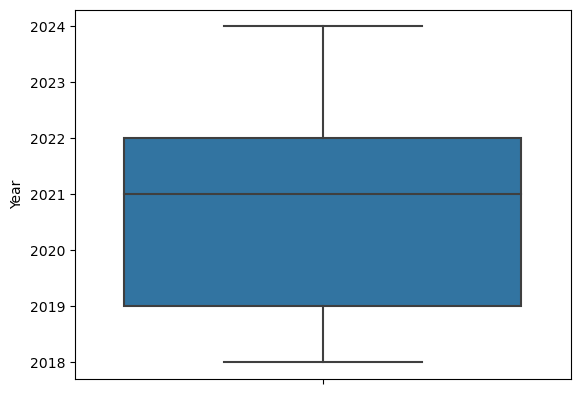

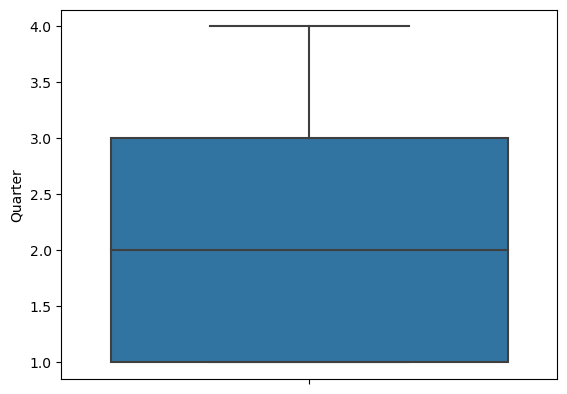

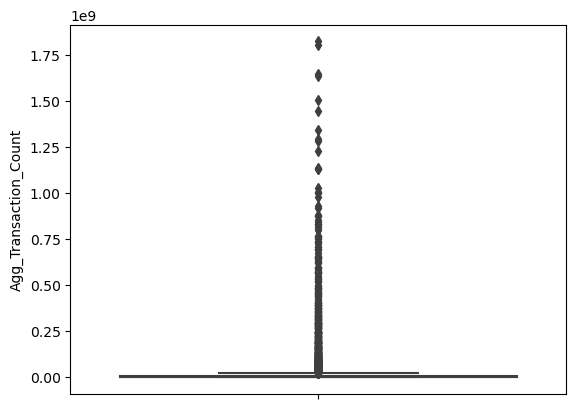

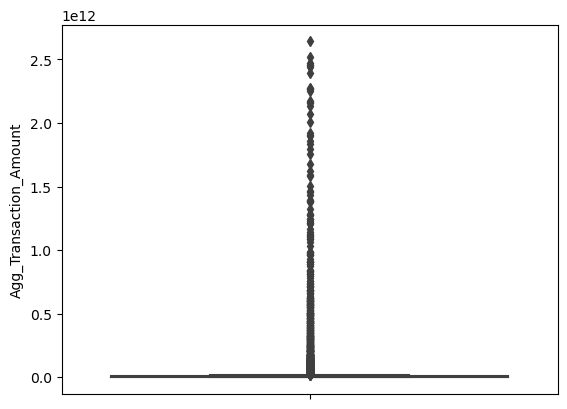

In [12]:
# identifying outliers in each numerical column
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,y=i)
    plt.show()

In [13]:
# fixing of outliers in each numerical column
#Outlier Treatment: Remove top 65% & bottom 2% 

Q3 = df['Transaction_Amount'].quantile(0.35)
Q1 = df['Transaction_Amount'].quantile(0.02)
df2 = df[(df['Transaction_Amount'] >= Q1) & (df['Transaction_Amount'] <= Q3)]
sns.boxplot(df2['Transaction_Amount'])
plt.show()

KeyError: 'Transaction_Amount'

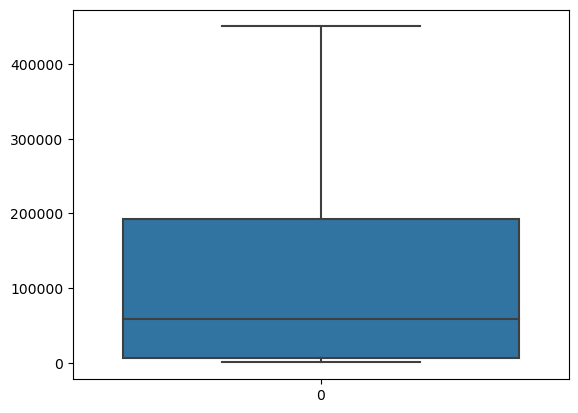

In [ ]:
#Outlier Treatment: Remove top 50% & bottom 2% 

Q3 = df['Transaction_Count'].quantile(0.50)
Q1 = df['Transaction_Count'].quantile(0.02)
df2 = df[(df['Transaction_Count'] >= Q1) & (df['Transaction_Count'] <= Q3)]
sns.boxplot(df2['Transaction_Count'])
plt.show()

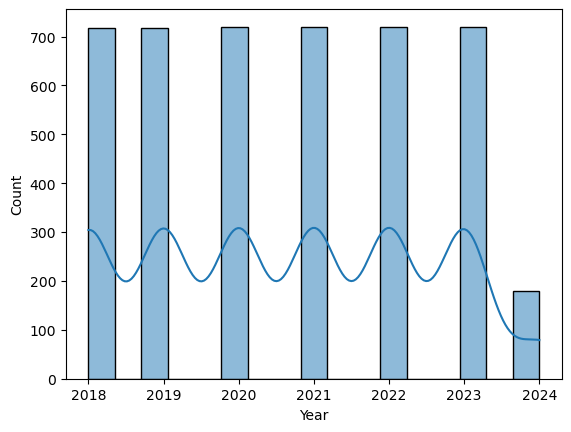

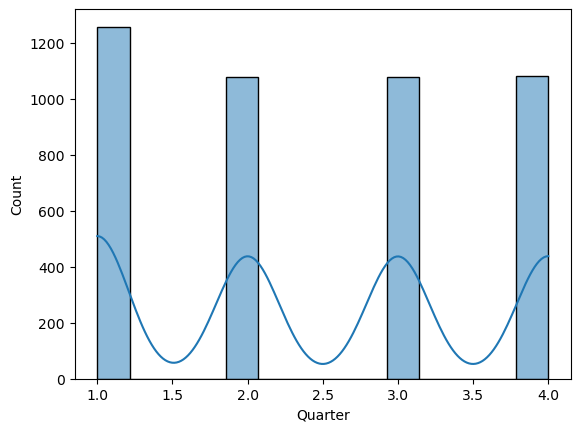

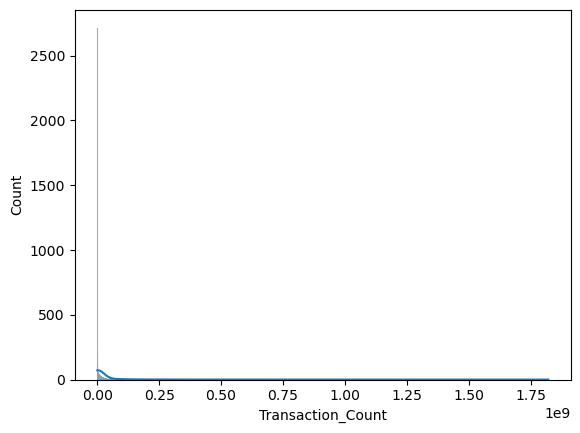

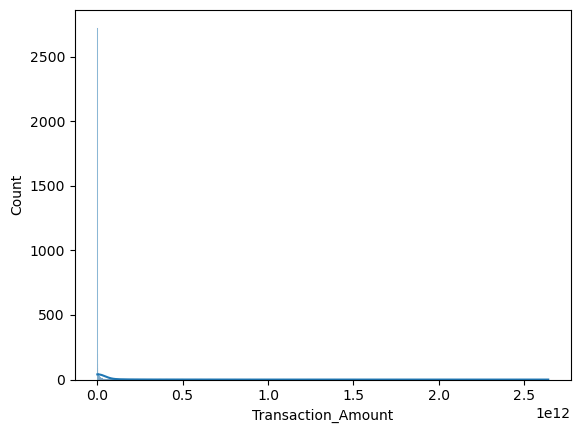

In [ ]:
#----------------------- / univariate analysis /------------------------------------#
for i in df.select_dtypes(include='number').columns: 
    sns.histplot(data=df,x=i,kde=True)
    plt.show()

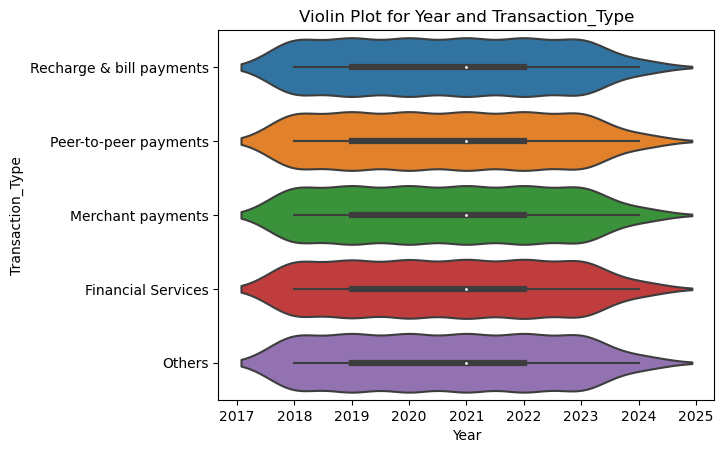

In [ ]:
# ---------------------- / bivariate analysis /----------------------- #
sns.violinplot(x="Year", y="Transaction_Type", data=df,alpha=0.7)

plt.title('Violin Plot for Year and Transaction_Type')
plt.xlabel('Year')
plt.ylabel('Transaction_Type')
plt.show()

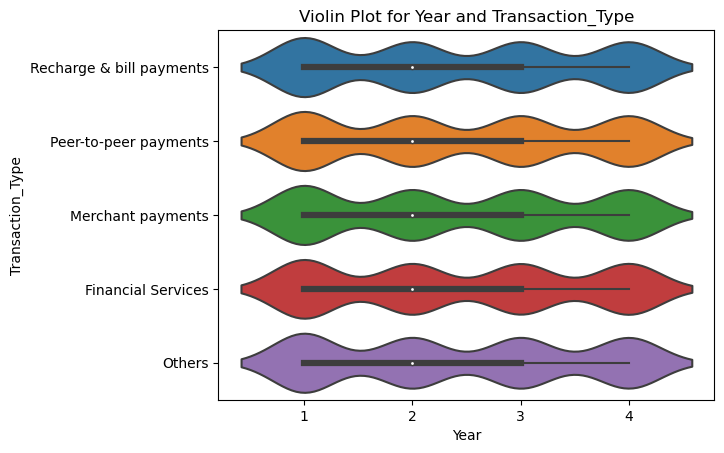

In [ ]:
sns.violinplot(x="Quarter", y="Agg_Transaction_Type", data=df,alpha=0.7)

plt.title('Violin Plot for Year and Transaction_Type')
plt.xlabel('Year')
plt.ylabel('Transaction_Type')
plt.show()

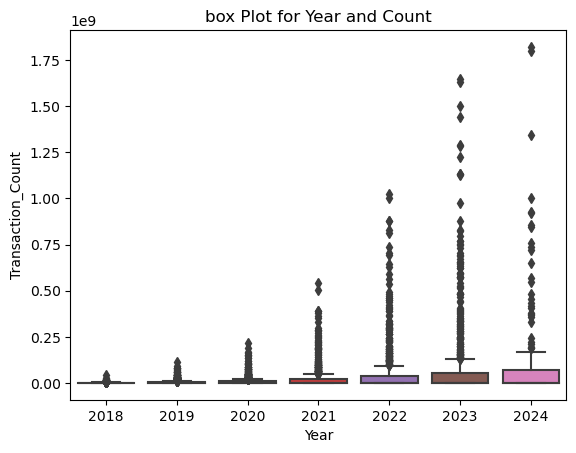

In [ ]:
sns.boxplot(x="Year", y="Transaction_Count", data=df)

plt.title('box Plot for Year and Count')
plt.xlabel('Year')
plt.ylabel('Transaction_Count')
plt.show()

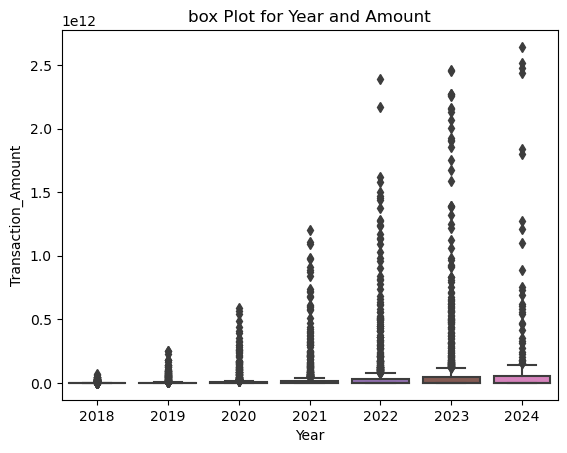

In [ ]:
sns.boxplot(x="Year", y="Transaction_Amount", data=df)

plt.title('box Plot for Year and Amount')
plt.xlabel('Year')
plt.ylabel('Transaction_Amount')
plt.show()

In [ ]:
df

NameError: name 'df' is not defined

<Axes: xlabel='Agg_Transaction_Count', ylabel='State'>

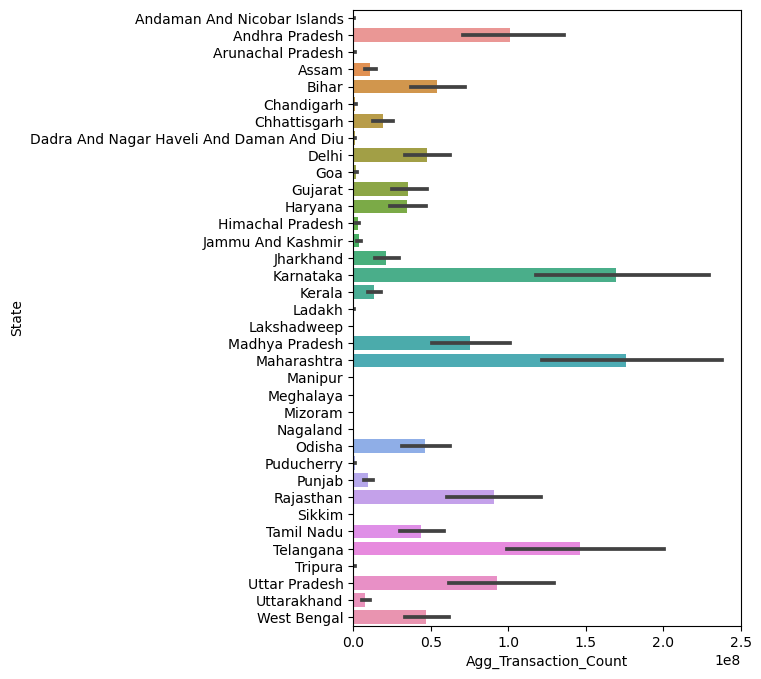

In [ ]:
plt.figure(figsize=(5, 8))
sns.barplot(y=df["State"], x=df["Agg_Transaction_Count"])

<Axes: xlabel='Agg_Transaction_Amount', ylabel='State'>

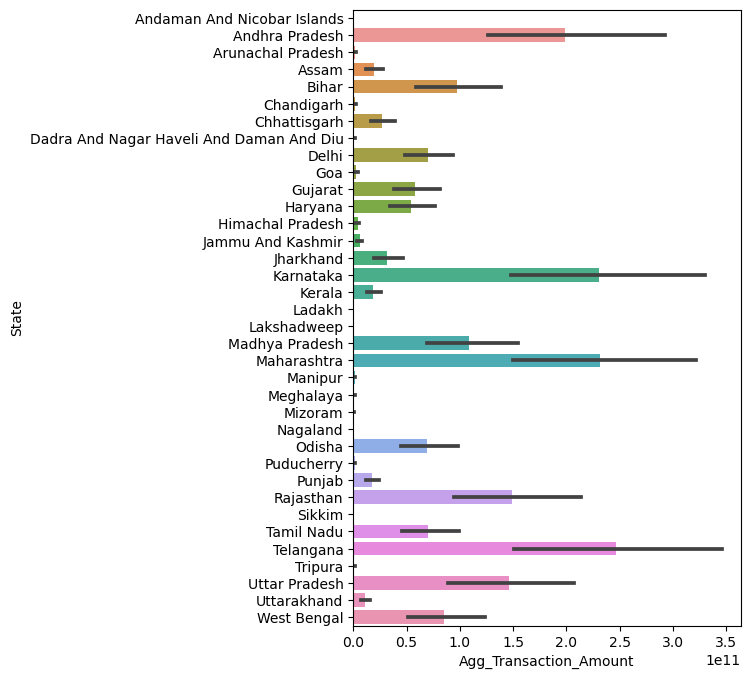

In [ ]:
plt.figure(figsize=(5, 8))
sns.barplot(y=df["State"], x=df["Agg_Transaction_Amount"])

<Axes: xlabel='Year', ylabel='Agg_Transaction_Count'>

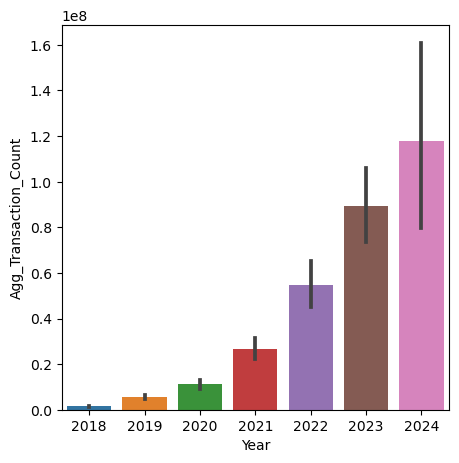

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x=df["Year"], y=df["Agg_Transaction_Count"])

<Axes: xlabel='Year', ylabel='Agg_Transaction_Amount'>

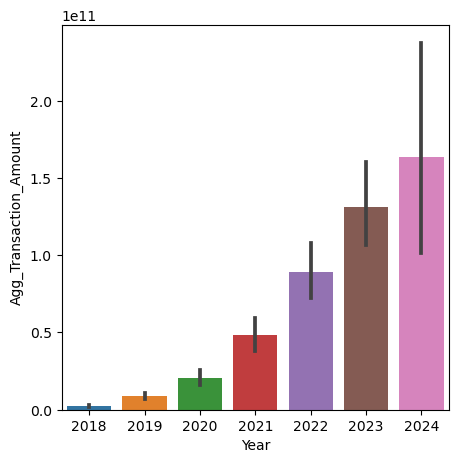

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x=df["Year"], y=df["Agg_Transaction_Amount"])

<Axes: xlabel='Quarter', ylabel='Agg_Transaction_Count'>

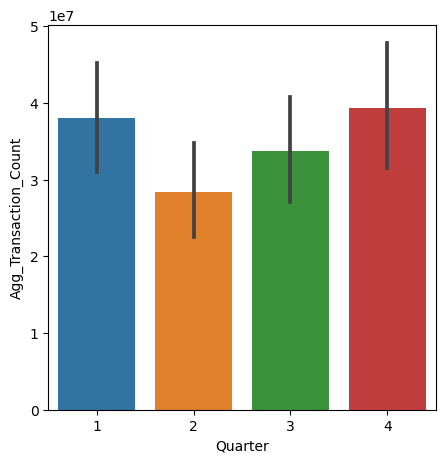

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x=df["Quarter"], y=df["Agg_Transaction_Count"])

<Axes: xlabel='Quarter', ylabel='Agg_Transaction_Amount'>

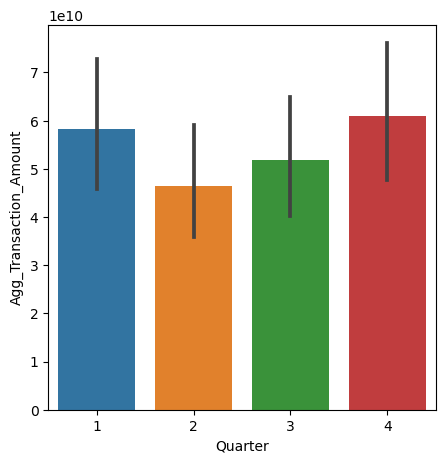

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x=df["Quarter"], y=df["Agg_Transaction_Amount"])

<Axes: xlabel='Agg_Transaction_Count', ylabel='Agg_Transaction_Type'>

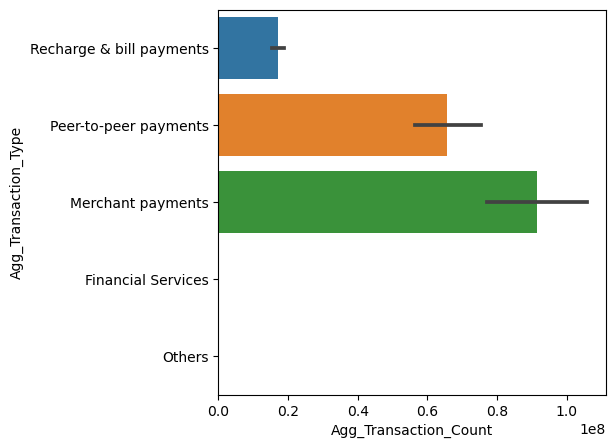

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(y=df["Agg_Transaction_Type"], x=df["Agg_Transaction_Count"])

<Axes: xlabel='Agg_Transaction_Amount', ylabel='Agg_Transaction_Type'>

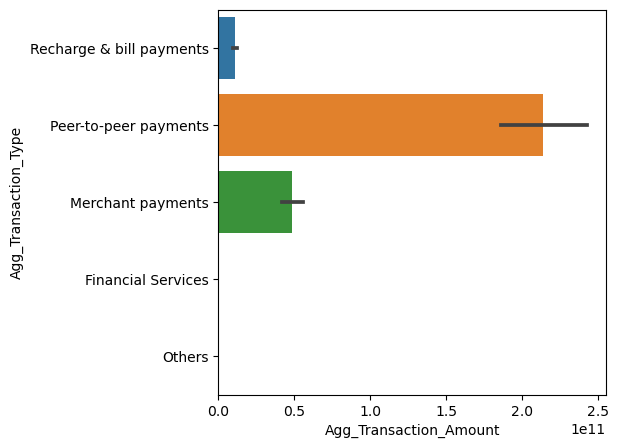

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(y=df["Agg_Transaction_Type"], x=df["Agg_Transaction_Amount"])

In [ ]:
# ------------------- / multivariate analysis /------------------#

df1 = df[["Year","Quarter","Transaction_Count","Transaction_Amount"]].corr()




In [ ]:
df1

,Year,Quarter,Transaction_Count,Transaction_Amount
Year,1.000000,-0.099011,0.262206,0.222519
Quarter,-0.099011,1.000000,0.006246,0.005533
Transaction_Count,0.262206,0.006246,1.000000,0.684603
Transaction_Amount,0.222519,0.005533,0.684603,1.000000


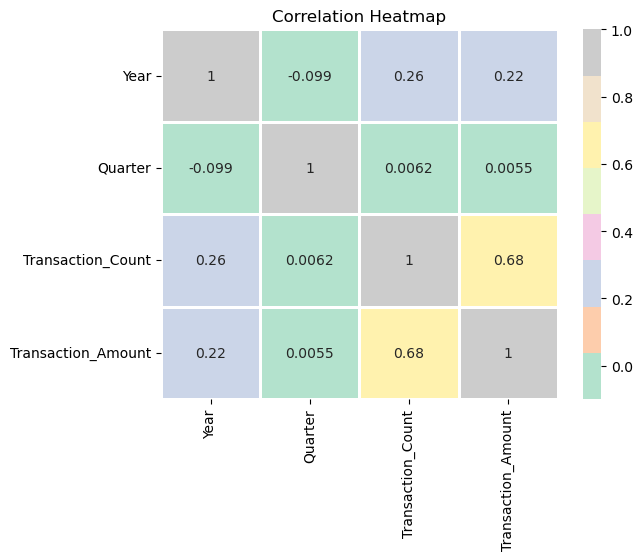

In [ ]:
sns.heatmap(df1, annot=True,  cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

In [ ]:
###  SOME OF THE POSSIBLE INSIGHTS:

# Most of the digital transactions are done in Maharashtra.

# Transaction Amount wise telangana is on top.

# Most of the Transactions Countwise and  Amountwise are done in 2024.

# Most of the Transactions are done in Quarter4.

# Transactions Countwise Merchant Payments are more.

# Transactions Amountwise Peer to Peer payments are more.

# Transaction Count and Amount are More Corelated Compare to Other.
 





